In [321]:
import numpy as np

## Conjuntos de treinamento

In [322]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

### AND

Resultados respectivos a cada entrada armazenada na lista de combinações após a aplicação da operação lógica `AND`. 

| x | y | z |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

In [323]:
and_targets = np.array([[0], [0], [0], [1]])

### OR

Resultados respectivos a cada entrada armazenada na lista de combinações após a aplicação da operação lógica `OR`. 

| x | y | z |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

In [324]:
or_targets = np.array([[0], [1], [1], [1]])

### XOR

Resultados respectivos a cada entrada armazenada na lista de combinações após a aplicação da operação lógica `XOR`. 

| x | y | z |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [325]:
xor_targets = np.array([[0], [1], [1], [0]])

## Rede Neural

A implementação da [Rede Neural](https://en.wikipedia.org/wiki/Artificial_neural_network) especificada abaixo tem como base o modelo de perceptron multicamadas e enfoque na classificação por retropropagação com a opção de utilização de duas funções para o cálculo da saída de determinado neurônio, sendo elas a  **sigmoide** e a **hiperbólica**.

Tanto o procedimento de inicialização quanto o de execução utilizados seguem o processo especificado em sala de aula:

1. Inicialmente os pesos sinápticos de entrada e saída das camadas de neurônios ocultos são determinados aleatoriamente.

2. O valor da ativação é calculado a partir do produto vetorial dos vetores de entradas e de pesos.

3. O valor de saída é determinado a partir da função escolhida (a versão atual utiliza a função hiperbólica).

4. O erro da camada de saída é calculado a partir da fórmula:

    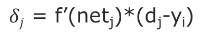

    Como especificado em
    
    ```python
        out_err = target - final_out
        out_delta = out_err * self.tanh_deriv(final_out)
    ```

    E o erro das camadas ocultas é calculado por:

    ```python
        h_err = np.dot(out_delta, self.out_w.T)
        h_delta = h_err * self.tanh_deriv(h_out)
    ```

5. O ajuste dos pesos é calculado com base nos erros identificados em determinada iteração:
    
    ```python
        self.in_w += learning_rate * np.outer(inputs, h_delta)
    ```

In [326]:
class NeuralNetwork:
    def __init__(self, isize=2, hsize=4, osize=1):
        self.isize = isize
        self.hsize = hsize
        self.osize = osize

        # Weight initialization
        self.in_w = np.random.rand(self.isize, self.hsize)
        self.out_w = np.random.rand(self.hsize, self.osize)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        return x * (1 - x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_deriv(self, x):
        return 1.0 - np.tanh(x) ** 2

    def propagate(self, inputs):
        h_sum = np.dot(inputs, self.in_w)
        h_out = self.tanh(h_sum)

        # Output layer
        out_sum = np.dot(h_out, self.out_w)
        final_out = self.tanh(out_sum)

        return h_out, final_out

    def backpropagate(self, inputs, target, h_out, final_out, learning_rate):
        out_err = target - final_out
        out_delta = out_err * self.tanh_deriv(final_out)

        self.out_w += learning_rate * np.outer(h_out, out_delta)

        # Errors that happened in the hidden layers
        h_err = np.dot(out_delta, self.out_w.T)
        h_delta = h_err * self.tanh_deriv(h_out)

        # Update hidden layers' weights
        self.in_w += learning_rate * np.outer(inputs, h_delta)

    def train(self, inputs, targets, iterations=5000, learning_rate=.08):
        for iter in range(iterations):
            # Total error
            err = 0
            for i in range(len(inputs)):
                input_data = inputs[i]
                target_data = targets[i]

                # Propagate
                h_out, final_out = self.propagate(input_data)

                # Backpropagate
                self.backpropagate(input_data, target_data, h_out, final_out, learning_rate)

                err += np.sum((target_data - final_out) ** 2)

            if iter % 1000 == 0:
                print(f"Iter: {iter}\t Error: {err / len(inputs)}")

## Treinamento

In [327]:
input_size = 2
hidden_size = 6
output_size = 1
learning_rate = 0.1
iterations = 10000

### AND

In [328]:
neural_net_and = NeuralNetwork(input_size, hidden_size, output_size)
neural_net_and.train(inputs, and_targets, iterations, learning_rate)

Iter: 0	 Error: 0.4481788024485403
Iter: 1000	 Error: 5.877233860710746e-05


Iter: 2000	 Error: 9.467566301039427e-06
Iter: 3000	 Error: 3.4829755472410718e-06
Iter: 4000	 Error: 1.7488193432981806e-06
Iter: 5000	 Error: 1.0344436248333655e-06
Iter: 6000	 Error: 6.770341270346617e-07
Iter: 7000	 Error: 4.746074727321206e-07
Iter: 8000	 Error: 3.4963440211109543e-07
Iter: 9000	 Error: 2.6742193085221696e-07


### OR

In [329]:
neural_net_or = NeuralNetwork(input_size, hidden_size, output_size)
neural_net_or.train(inputs, or_targets, iterations, learning_rate)

Iter: 0	 Error: 0.039393005944754304
Iter: 1000	 Error: 1.7406559048616257e-06
Iter: 2000	 Error: 3.82180438259308e-07
Iter: 3000	 Error: 1.5794066955263732e-07
Iter: 4000	 Error: 8.453467270443677e-08
Iter: 5000	 Error: 5.2118157714579974e-08
Iter: 6000	 Error: 3.513272611267727e-08
Iter: 7000	 Error: 2.5184983669007372e-08
Iter: 8000	 Error: 1.888378813208689e-08
Iter: 9000	 Error: 1.4652881389241122e-08


### XOR

In [330]:
neural_net_xor = NeuralNetwork(input_size, hidden_size, output_size)
neural_net_xor.train(inputs, xor_targets, iterations, learning_rate)

Iter: 0	 Error: 0.25112666759264846
Iter: 1000	 Error: 0.00014721813663351083
Iter: 2000	 Error: 2.1805424971581473e-05
Iter: 3000	 Error: 7.951387789501374e-06
Iter: 4000	 Error: 3.998632787500239e-06
Iter: 5000	 Error: 2.374332659404816e-06
Iter: 6000	 Error: 1.560637597191495e-06
Iter: 7000	 Error: 1.0986033734621846e-06
Iter: 8000	 Error: 8.125040815690101e-07
Iter: 9000	 Error: 6.237189798109872e-07


## Teste

### AND

In [331]:
for i in range(len(inputs)):
    input = inputs[i]
    _, out = neural_net_and.propagate(input)
    print(f"Input: {input}, Output: {out}")

Input: [0 0], Output: [0.]
Input: [0 1], Output: [0.00026171]
Input: [1 0], Output: [0.00026457]
Input: [1 1], Output: [0.9991674]


### OR

In [332]:
for i in range(len(inputs)):
    input = inputs[i]
    _, out = neural_net_or.propagate(input)
    print(f"Input: {input}, Output: {out}")

Input: [0 0], Output: [0.]
Input: [0 1], Output: [0.9998265]
Input: [1 0], Output: [0.99987118]
Input: [1 1], Output: [0.99999459]


### XOR

In [333]:
for i in range(len(inputs)):
    input = inputs[i]
    _, out = neural_net_xor.propagate(input)
    print(f"Input: {input}, Output: {out}")

Input: [0 0], Output: [0.]
Input: [0 1], Output: [0.99904763]
Input: [1 0], Output: [0.99905864]
Input: [1 1], Output: [1.34974669e-05]


## Questão 1 (Conclusões)

Uma análise comparativa foi realizada considereando os atributos cuja especificação pode ser definida arbitrariamente, tais como a quantidade de camadas ocultas a serem utilizadas pelo modelo, a quantidade de saídas suportadas pelo algoritmo, a taxa de aprendizado, o número de iterações de propagação e a função de ativação.

A alteração mais significativa quando comparados os resultados se mostrou no uso da função hiperbólica em contraste à função sigmoide, no sentido em que os resultados apresentados após o uso da primeira possuíram uma acurácia consideravelmente maior que a segunda (uma ordem de magnitude). Essa observação é de extrema importância uma vez que revela o quão sensível as classificações são frente à escolha e experimentação de funções de ativação. O segundo maior fator de mudança se deu na utilização de diferentes taxas de aprendizado e o fenômeno observado é descrito abaixo:

- Para uma taxa de aprendizado suficientemente baixa (< 0.1), as classificações geraram resultados insatisfatórios principalmente para as operações `AND` e `XOR` sobre todas as entradas exceto as variáveis [0,0], que foram sempre classificadas corretamente independentemente de qualquer alteração.

- Taxas situadas em um intervalo entre 0.3 e 0.4 apresentaram resultados satisfatórios para ambas as operações `AND` e `OR`. Todavia, com um aumento dos valores nesse intervalo, a classificação da operação `XOR` se tornou cada vez menos efetiva.

- Taxas de aprendizado no intervalo 0.1 a 0.2 apresentaram os melhores resultados gerais de classificação. Porém, é importante apontar que os melhores valores de classificação das operações `AND` e `OR` não foram resultados do uso de uma taxa nesse intervalo, e sim do uso dos intervalos mencionados acima. A relevância desse intervalo é dada pelo seu maior balanceamento nos resultados de classificação, já que nele a operação `XOR` foi classificada com as maiores taxas de acerto. 